<a href="https://colab.research.google.com/github/hr7git/20250714_count_TAX/blob/main/Knou%EC%9D%B8%EA%B3%B5%EC%A7%80%EB%8A%A5_ResNet_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[1] 필요한 패키지 불러오기

In [ ]:
from tensorflow.keras import datasets
from tensorflow.keras import Model, Input, optimizers
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.layers import Conv2D, ReLU
from tensorflow.keras.layers import MaxPooling2D
import matplotlib.pyplot as plt
import numpy as np

[2] MNIST 필기체 숫자 데이터세트 준비

In [ ]:
(train_imgs, train_labels), (test_imgs, test_labels) = datasets.mnist.load_data()

# 픽셀 값을 0~1 사이로 정규화
train_imgs, test_imgs = train_imgs / 255.0, test_imgs / 255.0

# Conv2D에 맞게 데이터 reshape
train_imgs = train_imgs.reshape(60000, 28, 28, 1)
test_imgs = test_imgs.reshape(10000, 28, 28, 1)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


[3] Residual block을 구성하는 함수

In [ ]:
def res_blk(x, n_filters, f_size=3):
    xx = Conv2D(n_filters, f_size, padding='same')(x)
    xx = ReLU()(xx)
    xx = Conv2D(n_filters, f_size, padding='same')(xx)
    return ReLU()(xx + x)

[4] 모델 구성 후 요약 정보 출력

In [ ]:
inputs = Input(shape=(28, 28, 1))
x = Conv2D(64, 3, activation='relu')(inputs)
x = res_blk(x, 64, 3)
x = MaxPooling2D((2, 2))(x)
x = res_blk(x, 64, 3)
x = MaxPooling2D((2, 2))(x)
x = Conv2D(32, 3)(x)
x = Flatten()(x)
x = Dense(64, activation='relu')(x)
outputs = Dense(10, activation='softmax')(x)

model = Model(inputs=inputs, outputs=outputs)
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 28, 28, 1) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 26, 26,    │        640 │ input_layer[0][0] │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1 (Conv2D)   │ (None, 26, 26,    │     36,928 │ conv2d[0][0]      │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ re_lu (ReLU)        │ (None, 26, 26,    │          0 │ conv2d_1[0][0]    │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_2 (Conv2D)   │ (None, 26, 26,    │     36,928 │ re_lu[0][0]       │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add (Add)           │ (None, 26, 26,    │          0 │ conv2d_2[0][0],   │
│                     │ 64)               │            │ conv2d[0][0]      │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ re_lu_1 (ReLU)      │ (None, 26, 26,    │          0 │ add[0][0]         │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d       │ (None, 13, 13,    │          0 │ re_lu_1[0][0]     │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_3 (Conv2D)   │ (None, 13, 13,    │     36,928 │ max_pooling2d[0]… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ re_lu_2 (ReLU)      │ (None, 13, 13,    │          0 │ conv2d_3[0][0]    │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_4 (Conv2D)   │ (None, 13, 13,    │     36,928 │ re_lu_2[0][0]     │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_1 (Add)         │ (None, 13, 13,    │          0 │ conv2d_4[0][0],   │
│                     │ 64)               │            │ max_pooling2d[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ re_lu_3 (ReLU)      │ (None, 13, 13,    │          0 │ add_1[0][0]       │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_1     │ (None, 6, 6, 64)  │          0 │ re_lu_3[0][0]     │
│ (MaxPooling2D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_5 (Conv2D)   │ (None, 4, 4, 32)  │     18,464 │ max_pooling2d_1[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten (Flatten)   │ (None, 512)       │          0 │ conv2d_5[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 64)        │     32,832 │ flatten[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_1 (Dense)     │ (None, 10)        │        650 │ dense[0][0]     

 Total params: 200,298 (782.41 KB)

 Trainable params: 200,298 (782.41 KB)

 Non-trainable params: 0 (0.00 B)

[5] 모델 컴파일

In [ ]:
model.compile(optimizer=optimizers.SGD(0.01, momentum=0.9),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

[6] 모델 훈련

In [ ]:
model.fit(train_imgs, train_labels, epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.8792 - loss: 0.3663
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9854 - loss: 0.0486
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9906 - loss: 0.0299
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.9930 - loss: 0.0235
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9950 - loss: 0.0159


[7] 테스트 집합에 대한 인식 결과 구하기

In [ ]:
result = model.predict(test_imgs)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


[8] 첫 25개의 이미지와 인식 결과 디스플레이

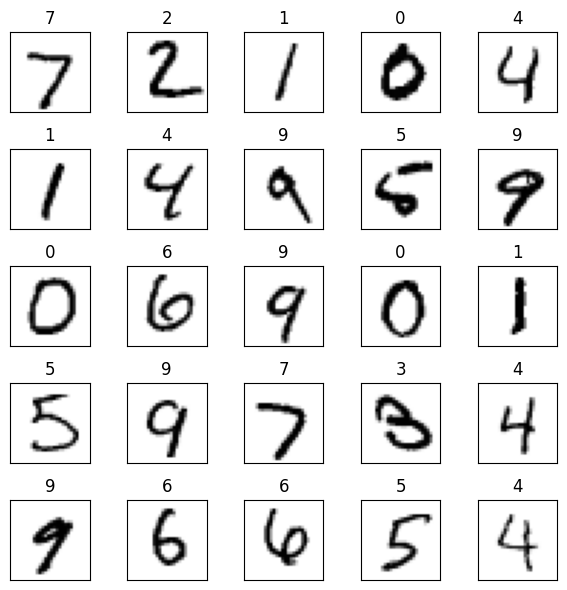

In [ ]:
plt.figure(figsize=(6, 6), tight_layout=True)
for i in range(25):
    plt.subplot(5, 5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    timg = test_imgs[i].reshape(28, 28)
    plt.imshow(timg, cmap=plt.cm.gray_r)
    plt.title('{}'.format(np.argmax(result[i])))
plt.show()

[9] 오인식 이미지 리스트를 구함

In [ ]:
err_imgs, err_labels = [], []
for i in range(10000):
    lbl = np.argmax(result[i])
    if lbl != test_labels[i]:
        err_imgs.append(test_imgs[i])
        err_labels.append('{}-->{}'.
                          format(test_labels[i], lbl))
print('인식률  = ', (10000 - len(err_labels)) / 10000)

인식률  =  0.9904


[10] 첫 25개의 오인식 이미지 디스플레이

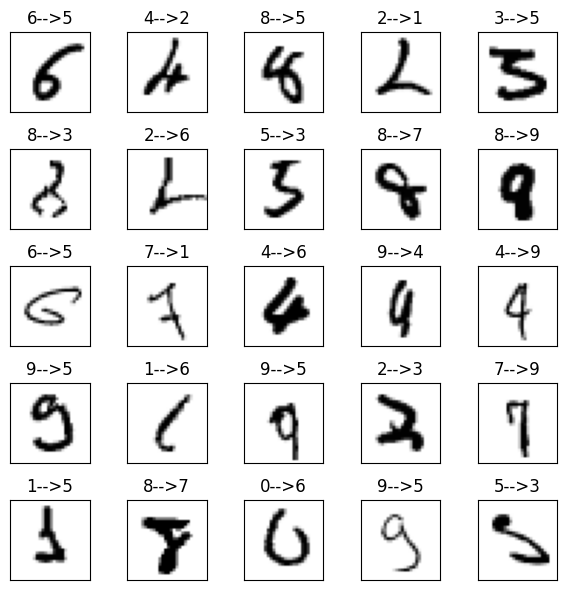

In [ ]:
plt.figure(figsize=(6, 6), tight_layout=True)
for i in range(min(25, len(err_labels))):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    timg = err_imgs[i].reshape(28, 28)
    plt.imshow(timg, cmap=plt.cm.gray_r)
    plt.title(err_labels[i])
plt.show()